<Figure size 1000x600 with 0 Axes>

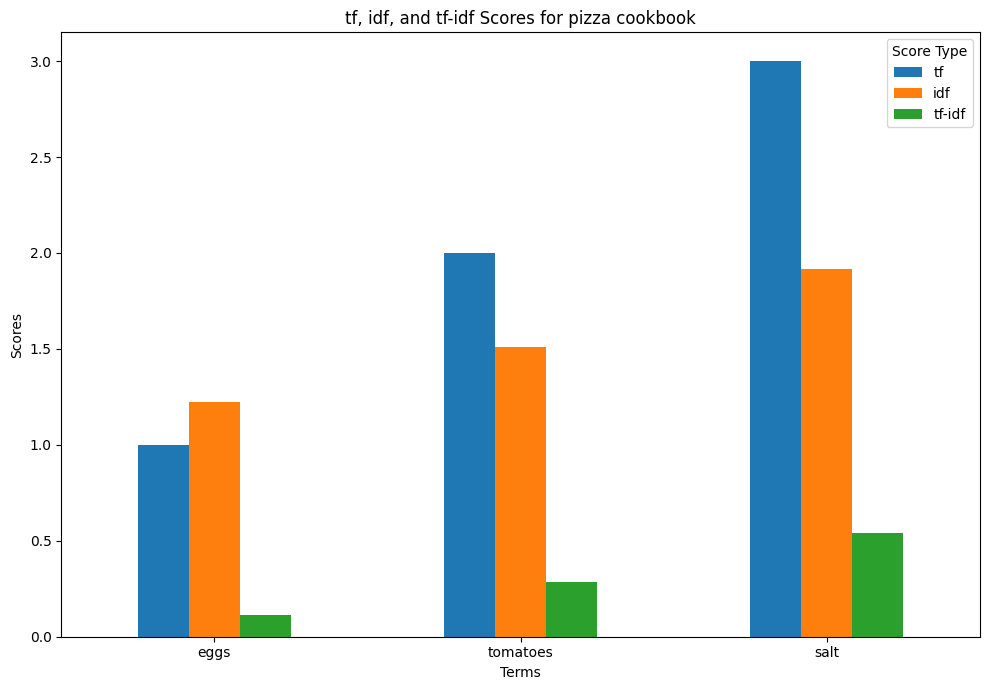

,tf,idf,tf-idf
eggs,1.0,1.223144,0.115074
tomatoes,2.0,1.510826,0.284278
salt,3.0,1.916291,0.540856


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



# Adjust the frequency of 'tomatoes' to be closer to 'salt' but still less
adjusted_documents = [
    "French cooking includes butter, sugar, and various other ingredients like flour and eggs.",
    "Italian cuisine uses tomatoes, pasta, garlic, olive oil extensively.",
    "Baking involves sugar, vanilla, chocolate, and often eggs.",
    # Increase the frequency of 'salt' and 'tomatoes' in the pizza document
    "Pizza recipes with a focus on salt and tomatoes. Ingredients include tomato sauce, salt, tomatoes, cheese, and eggs. Salt is often a key seasoning in pizza."
]

# Re-run the tf and tf-idf calculations with the adjusted documents
count_vectorizer_adjusted = CountVectorizer(lowercase=True, stop_words=None, min_df=1)
tf_matrix_adjusted = count_vectorizer_adjusted.fit_transform(adjusted_documents)
tfidf_vectorizer_adjusted = TfidfVectorizer(lowercase=True, stop_words=None, min_df=1)
tfidf_matrix_adjusted = tfidf_vectorizer_adjusted.fit_transform(adjusted_documents)

# Extract feature names and the vectors for the pizza cookbook
feature_names_adjusted = count_vectorizer_adjusted.get_feature_names_out()
pizza_tf_vector_adjusted = tf_matrix_adjusted.toarray()[-1]
pizza_tfidf_vector_adjusted = tfidf_matrix_adjusted.toarray()[-1]

# Calculate idf for each term
idf_adjusted = tfidf_vectorizer_adjusted.idf_

# Map words to their tf, idf, and tf-idf scores
word_to_scores_adjusted = {
    word: {
        'tf': tf,
        'idf': idf_val,
        'tf-idf': tfidf
    }
    for word, tf, idf_val, tfidf in zip(feature_names_adjusted, pizza_tf_vector_adjusted, idf_adjusted, pizza_tfidf_vector_adjusted)
}

# Convert to DataFrame for easy manipulation and viewing
scores_df_adjusted = pd.DataFrame(word_to_scores_adjusted).T

# Filter out the terms that do not appear in the pizza cookbook
scores_df_adjusted = scores_df_adjusted[scores_df_adjusted['tf'] > 0]

# Sort by tf-idf scores in descending order
scores_df_adjusted.sort_values('tf-idf', ascending=False, inplace=True)

# Selecting only 'eggs', 'tomatoes', and 'salt' for the graph
filtered_scores_df_adjusted = scores_df_adjusted.loc[['eggs', 'tomatoes', 'salt']]

# Plot the bar graph for 'eggs', 'tomatoes', and 'salt'
plt.figure(figsize=(10, 6))
filtered_scores_df_adjusted[['tf', 'idf', 'tf-idf']].plot(kind='bar', figsize=(10, 7), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('tf, idf, and tf-idf Scores for pizza cookbook')
plt.xlabel('Terms')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.tight_layout()

plt.show()

# Display the DataFrame for detailed numbers
filtered_scores_df_adjusted
